In [ ]:
# !pip install datasets[audio] librosa transformers

In [2]:
# 以流式模式加载数据集

from datasets import load_dataset

ds = load_dataset("facebook/voxpopuli", name="de", streaming=True)

In [3]:
# 以训练部分的前三个例子为例

ds_head = ds['train'].take(3)

In [4]:
# 获取第三个示例并进行探索

example = list(ds_head)[-1]
example

{'audio_id': '20150908-0900-PLENARY-3-de_20150908-09:01:12_26',
 'language': 1,
 'audio': {'path': 'train_part_0/20150908-0900-PLENARY-3-de_20150908-09:01:12_26.wav',
  'array': array([-0.01617432, -0.05258179, -0.06607056, ...,  0.00396729,
         -0.00219727, -0.00396729]),
  'sampling_rate': 16000},
 'raw_text': 'Denn es gibt biologische Grenzen beim Tier.',
 'normalized_text': 'denn es gibt biologische grenzen beim tier.',
 'gender': 'female',
 'speaker_id': '4282',
 'is_gold_transcript': True,
 'accent': 'None'}

In [5]:
# 聆听示例音频

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)

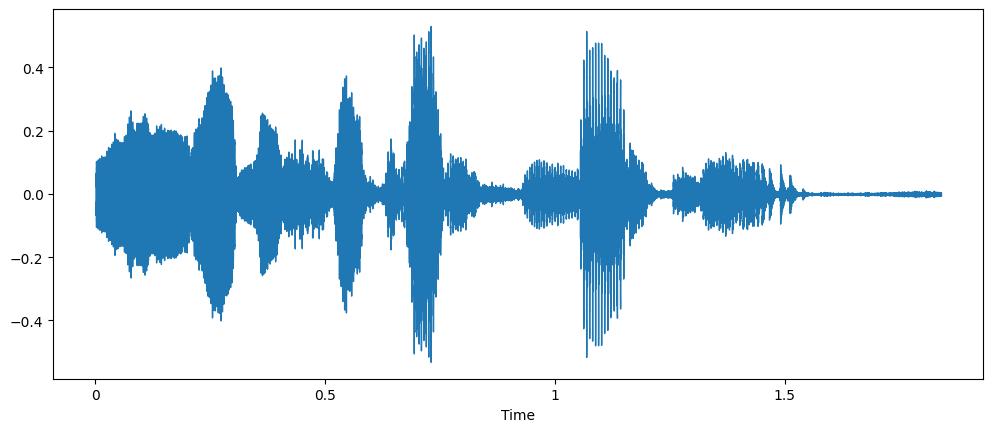

In [6]:
# 波形图

import librosa
import matplotlib.pyplot as plt
import librosa.display

array = example["audio"]["array"]
sampling_rate = example["audio"]["sampling_rate"]
plt.figure().set_figwidth(12)
librosa.display.waveshow(array, sr=sampling_rate)

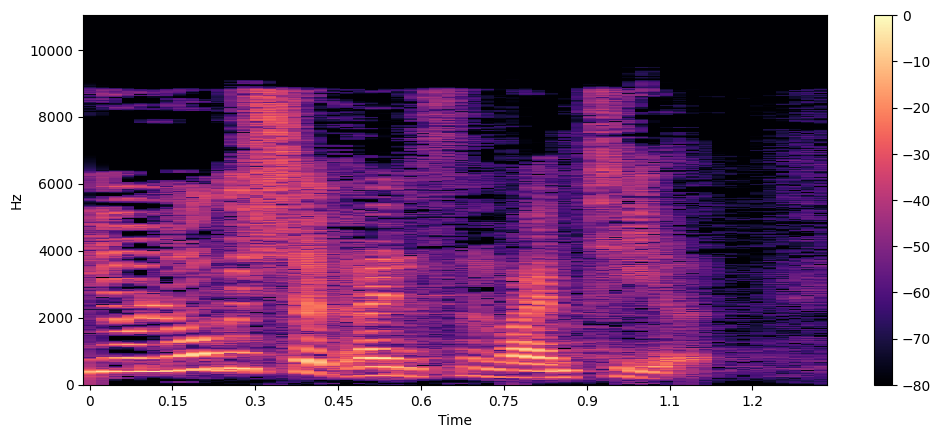

In [7]:
# 时频谱

import numpy as np

D = librosa.stft(array)
S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)

plt.figure().set_figwidth(12)
librosa.display.specshow(S_db, x_axis="time", y_axis="hz")
plt.colorbar()

In [8]:
from transformers import pipeline

asr = pipeline("automatic-speech-recognition", model="facebook/wav2vec2-large-xlsr-53-german")

config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.26G [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/wav2vec2-large-xlsr-53-german were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_v', 'wav2vec2.encoder.pos_conv_embed.conv.weight_g']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-xlsr-53-german and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1']
You should prob

tokenizer_config.json:   0%|          | 0.00/378 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/330 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/85.0 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/158 [00:00<?, ?B/s]

In [9]:
# 比较结果

print(asr(example["audio"]["array"]))
print(example["raw_text"])

{'text': 'logihe grenzen beim tier'}
Denn es gibt biologische Grenzen beim Tier.


In [10]:
# 再一次，听听比较。尽管输出结果与提供的转录不完全一致，但该模型实际上做得非常好。
# 你在音频中听不到 "Denn es gibt bio "的部分。

from IPython.display import Audio

Audio(example["audio"]["array"], rate=16000)